Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [16]:
#Install yfinance
!pip install yfinance --quiet
!pip install pandas --quiet
#libraries
import yfinance as yf
import pandas as pd

# Download historical data for a stock
tsla = yf.Ticker("TSLA")
tesla_data = tsla.history(period="max")
# Display the downloaded data
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


 Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function.

In [18]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

#Download the Website
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

#Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

#Find the Tesla Revenue table
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all("table")

for table in tables:
    
    if "Tesla Quarterly Revenue" in str(table):
        
        for row in table.find("tbody").find_all("tr"):
            
            cols = row.find_all("td")
            if len(cols) == 2:
                
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                tesla_revenue = pd.concat(
                    
                    [tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
                    ignore_index=True
                )

#Clean the Revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"\$", "", regex=True).str.replace(",", "")
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

#Dosplay last five rows
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function.

In [21]:
import yfinance as yf
#Download historical data stock
gme = yf.Ticker("gme")
gme_data = gme.history(period="max")
#Dosplay the downloaded data
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. 

In [22]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
#Dowload the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

#Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

#Find the Gme Revenue table
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all("table")

for table in tables:
    
    if "Gme Quarterly Revenue" in str(table):
        
        for row in table.find("tbody").find_all("tr"):
            
            cols = row.find_all("td")
            if len(cols) == 2:
                
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                gme_revenue = pd.concat(
                    
                    [gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
                    ignore_index=True
                )

#Clean the Revnue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"\$", "", regex=True).str.replace(",", "")
gme_revenue = gme_revenue[gme_revenue["Revenue"] !=""]

#Dusplay last five rows
print(gme_revenue.tail())

Empty DataFrame
Columns: [Date, Revenue]
Index: []


Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

C:\Users\Manny\AppData\Local\Temp\ipykernel_25140\2087726828.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme = yf.download("GME", period="6mo")
[*********************100%***********************]  1 of 1 completed


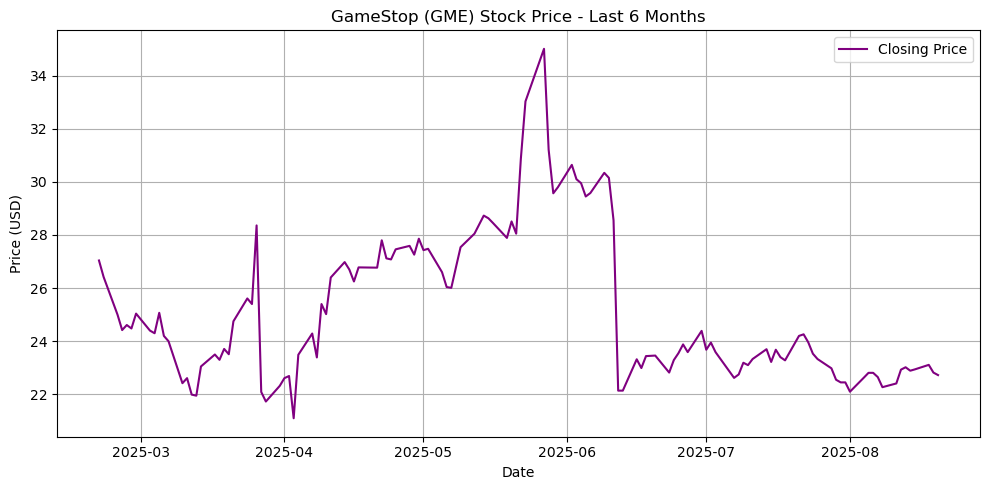

In [23]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, title):
    
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='purple')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Fetch GameStop stock data (last 6 months as an example)
gme = yf.download("GME", period="6mo")
# Make 'Date' a column for plotting
gme.reset_index(inplace=True) 

# Use the function
make_graph(gme, "GameStop (GME) Stock Price - Last 6 Months")

Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

C:\Users\Manny\AppData\Local\Temp\ipykernel_25140\4082889279.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla= yf.download("TSLA", period="3mo")
[*********************100%***********************]  1 of 1 completed


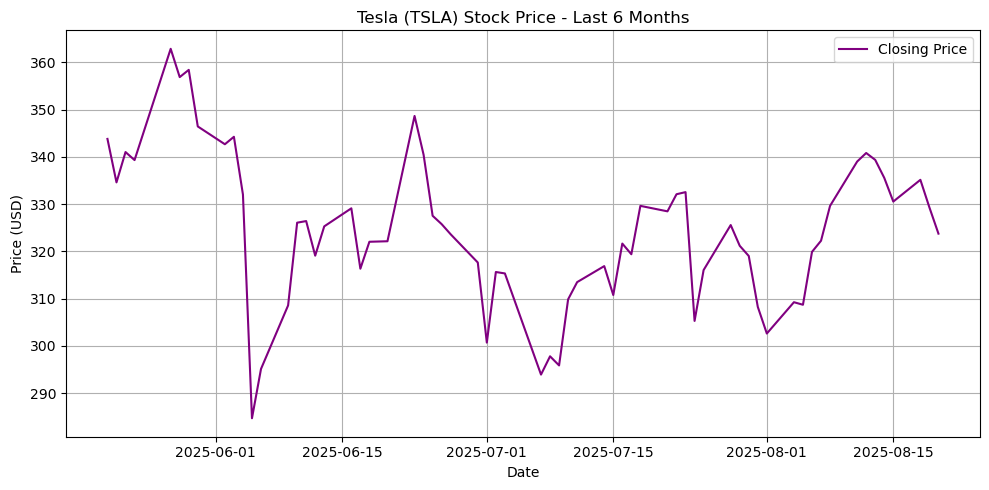

In [24]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, title):
    
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='purple')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

#Get GameStop stock data from "last 6 months"
tesla= yf.download("TSLA", period="3mo")
# Make 'Date' a column for plotting
tesla.reset_index(inplace=True)  

# Use the function
make_graph(tesla, "Tesla (TSLA) Stock Price - Last 6 Months")